## Projeto Data Science
### Juliana Bezerra Braga (20103531)
#### Temática escolhida: Smart Cities

### Variáveis da base de dados
##### Id: identificador
##### City: Nome da cidade
##### Country: País que a cidade pertence
##### Smart_Mobility: Índice calculado a partir da avaliação do Sistema de Transporte Público da cidade, TIC, infraestrutura de acessibilidade.
##### Smart_Environment: Índice calculado a partir do impacto da sustentabilidade ambiental, monitoramento da poluição e gestão de energia
##### Smart_Government: Índice calculado a partir de estudo comparativo de governança transparente e iniciativas de dados abertos de cidades inteligentes em todo o mundo. Além disso, a participação cidadã na tomada de decisões foi incluída.
##### Smart_economy: Índice calculado por meio de comparação global de produtividade em toda a cidade, vitalidade econômica e apoio ao empreendedorismo e inovação.
##### Smart_people: Índice calculado comparando a pluralidade social e cultural, os sistemas educacionais e suas instalações auxiliares de apoio em todo o mundo
##### Smart_Living: Índice calculado medindo a métrica em torno dos serviços de saúde, segurança social e qualidade da habitação.
##### SmartCity_Index: Pontuação agregada para o modelo de cidade inteligente com base em supergrupos de cidade inteligente.


In [ ]:
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Smart_City_index_headers.csv')

In [ ]:
# Retirada de variáveis que não terão utilidade

df
del df['SmartCity_Index']
del df['SmartCity_Index_relative_Edmonton']
del df['Id']

In [ ]:
new_df = pd.pivot_table(df, index=['City'], sort=False)
new_df

In [ ]:
# Renomeando colunas que possuem um espaço no final do nome


new_df.columns = ['Smart_Economy', 'Smart_Environment', 'Smart_Government',
       'Smart_Living', 'Smart_Mobility', 'Smart_People']

new_df.columns

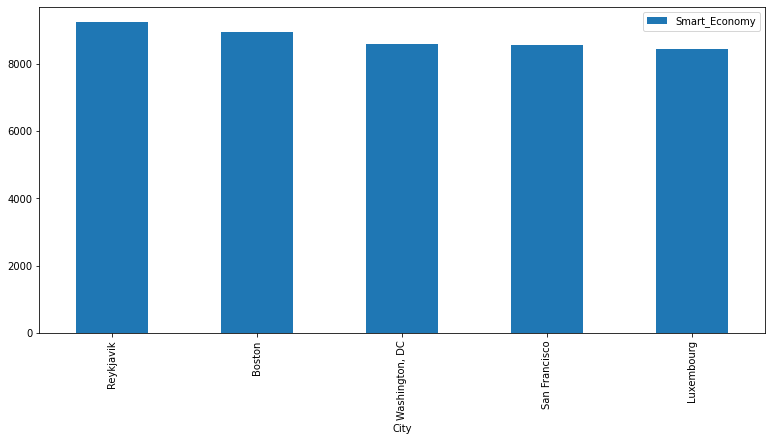

In [ ]:
# TOP 5 CIDADES: SMART ECONOMY

economy_data = pd.DataFrame(new_df['Smart_Economy']).sort_values(by=['Smart_Economy'], ascending=False)
top_economy = economy_data.head(n=5)

top_economy.plot(figsize=(13,6), kind='bar')

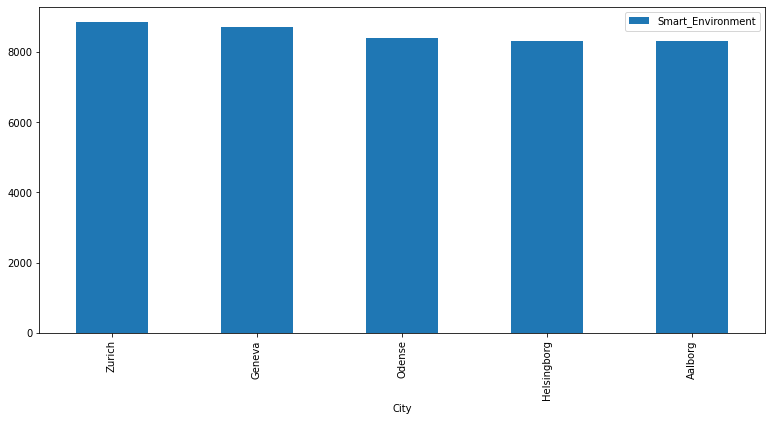

In [ ]:
# TOP 5 CIDADES: SMART ENVIRONMENT

env_data = pd.DataFrame(new_df['Smart_Environment']).sort_values(by=['Smart_Environment'], ascending=False)
top_env = env_data.head(n=5)

top_env.plot(figsize=(13,6), kind='bar')

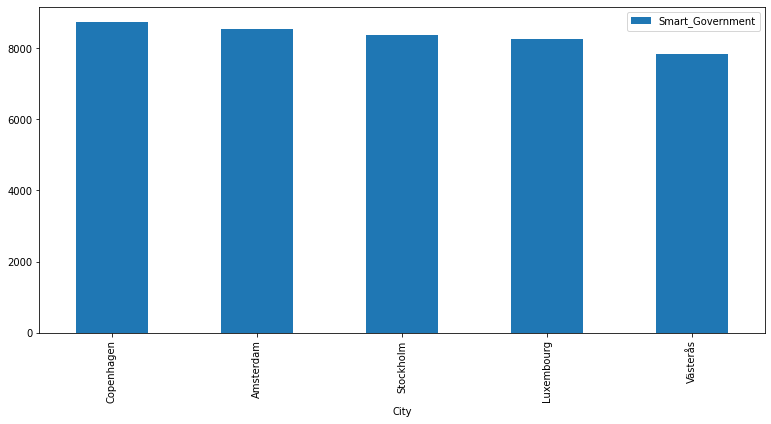

In [ ]:
# TOP 5 CIDADES: SMART GOVERNMENT

gov_data = pd.DataFrame(new_df['Smart_Government']).sort_values(by=['Smart_Government'], ascending=False)
top_gov = gov_data.head(n=5)

top_gov.plot(figsize=(13,6), kind='bar')


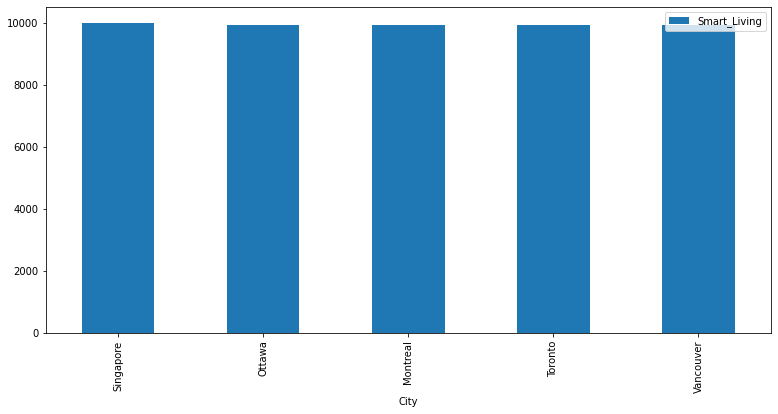

In [ ]:
# TOP 5 CIDADES: SMART LIVING

living_data = pd.DataFrame(new_df['Smart_Living']).sort_values(by=['Smart_Living'], ascending=False)
top_living = living_data.head(n=5)

top_living.plot(figsize=(13,6), kind='bar')

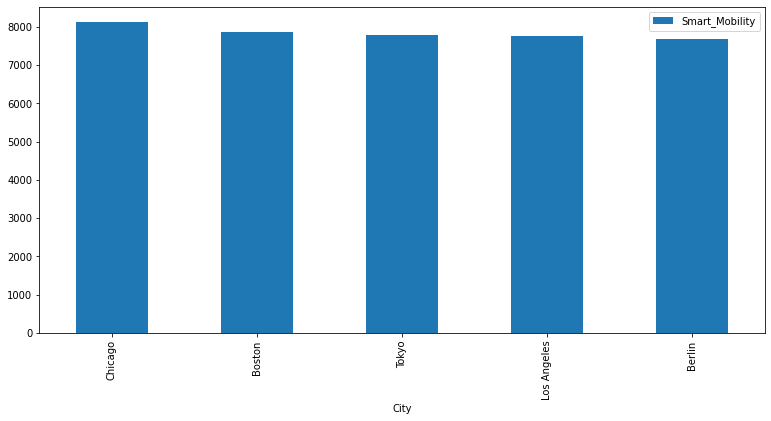

In [ ]:
# TOP 5 CIDADES: SMART MOBILITY

mob_data = pd.DataFrame(new_df['Smart_Mobility']).sort_values(by=['Smart_Mobility'], ascending=False)
top_mob = mob_data.head(n=5)

top_mob.plot(figsize=(13,6), kind='bar')

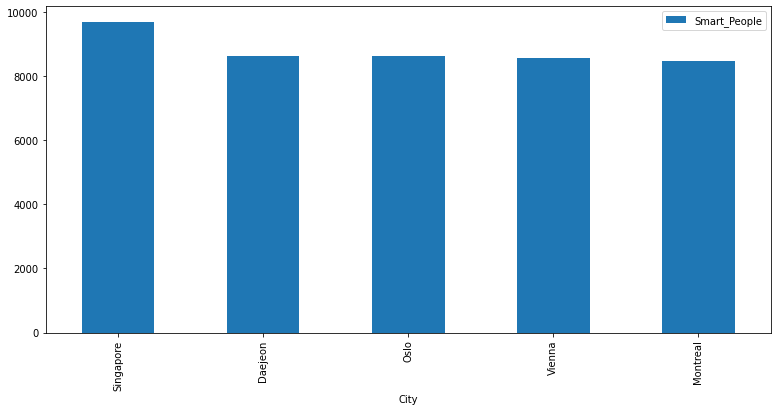

In [ ]:
# TOP 5 CIDADES: SMART PEOPLE

people_data = pd.DataFrame(new_df['Smart_People']).sort_values(by=['Smart_People'], ascending=False)
top_people = people_data.head(n=5)

top_people.plot(figsize=(13,6), kind='bar')

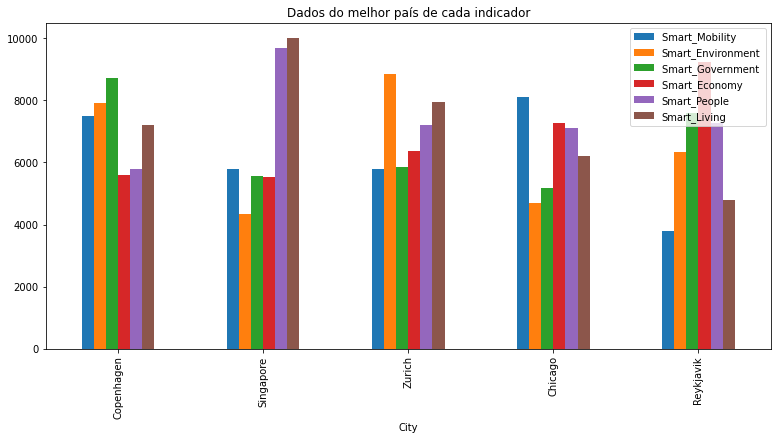

In [ ]:
# ANÁLISE DO PRIMEIRO PAÍS DE CADA INDICADOR 

top_cities_data = df[(df['City'] == 'Reykjavik') | (df['City'] == 'Zurich') | (df['City'] == 'Copenhagen') | (df['City'] == 'Singapore') | (df['City'] == 'Chicago')]
top_cities_data.plot(figsize=(13,6), kind='bar', x='City', title='Dados do melhor país de cada indicador')



## - Qual a correlação (usando Pearson) existente entre os indicadores?
#### Correlação de Pearson
#### 0.9 a 1 positivo ou negativo indica uma correlação muito forte.
#### 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
#### 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
#### 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
#### 0 - 0.3 : correlação desprezível

In [ ]:
# Criação de DataFrame com os valores de correlação entre cada parâmetro

corr_pearson = top_cities_data.corr(method='pearson')
corr_pearson

,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living
Smart_Mobility,1.000000,-0.101801,-0.163050,-0.563926,-0.333166,0.189636
Smart_Environment,-0.101801,1.000000,0.498823,-0.101790,-0.645379,-0.135036
Smart_Government,-0.163050,0.498823,1.000000,0.086587,-0.628442,-0.380292
Smart_Economy,-0.563926,-0.101790,0.086587,1.000000,-0.144283,-0.852977
Smart_People,-0.333166,-0.645379,-0.628442,-0.144283,1.000000,0.617203
Smart_Living,0.189636,-0.135036,-0.380292,-0.852977,0.617203,1.000000


Com o gráfico de correlação, identifica-se as maiores correlações de cada parâmetro:

- Smart_Mobility: Smart_Economy (-0.56 correlação moderada)
- Smart_Enviroment: Smart_People (-0.64 correlação moderada)
- Smart_Government: Smart_People (-0.62 correlação moderada)
- Smart_Economy: Smart_Living (-0.85 correlação forte)
- Smart_People: Smart_Enviroment (-0.64 correlaçao moderada)
- Smart_Living: Smart_Economy (-0.85 correlação forte)

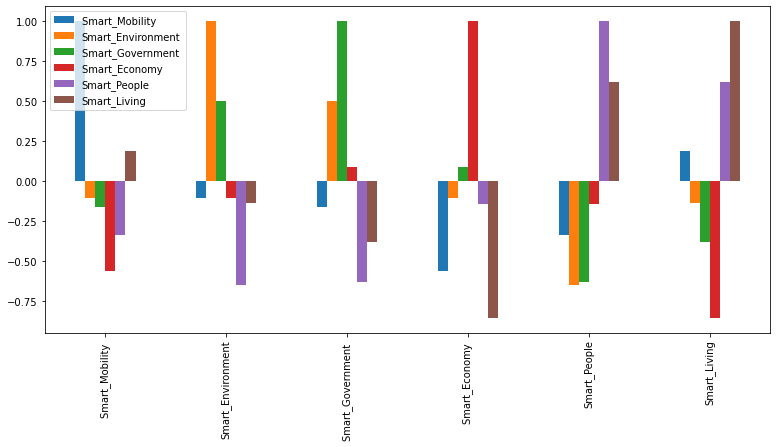

In [ ]:
# Análise gráfica da correlação

corr_pearson.plot(figsize=(13,6), kind='bar')

## - Qual cidade, dentre as 5 analisadas acima, possui maior média após a soma de todos os idnicadores?

In [ ]:
# Adiciona coluna de média ao DataFrame

top_cities_data['Mean'] = (top_cities_data.sum(axis=1)/6).round(1)

In [ ]:
# Ordena decrescentemente para identificar cidade com maior média SmartCity

smart_city = top_cities_data.sort_values(by=['Mean'], ascending=False).head(n=1)
smart_city

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,Mean
3,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7116.0


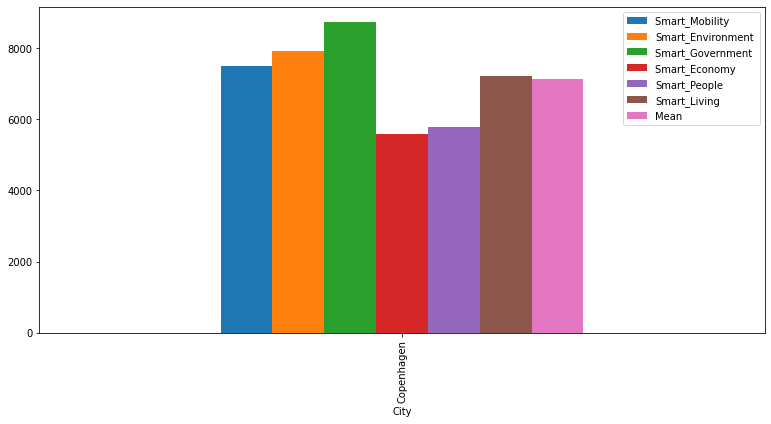

In [ ]:
# Análise gráfica da cidade com maior média de indicadores inteligentes

smart_city.plot(figsize=(13,6), x='City', kind='bar')